# Clustering

El objetivo del Clustering es agrupar datos que tengan ciertas similitudes o semejanzas los unos con los otros, los datos que pertenezcan a clusters diferentes, tengan rasgos lo mas diferentes posible, los algoritmos de clustering trabajaran en calculos de semejanza o desemejanza. ¿Como se clusteriza?.

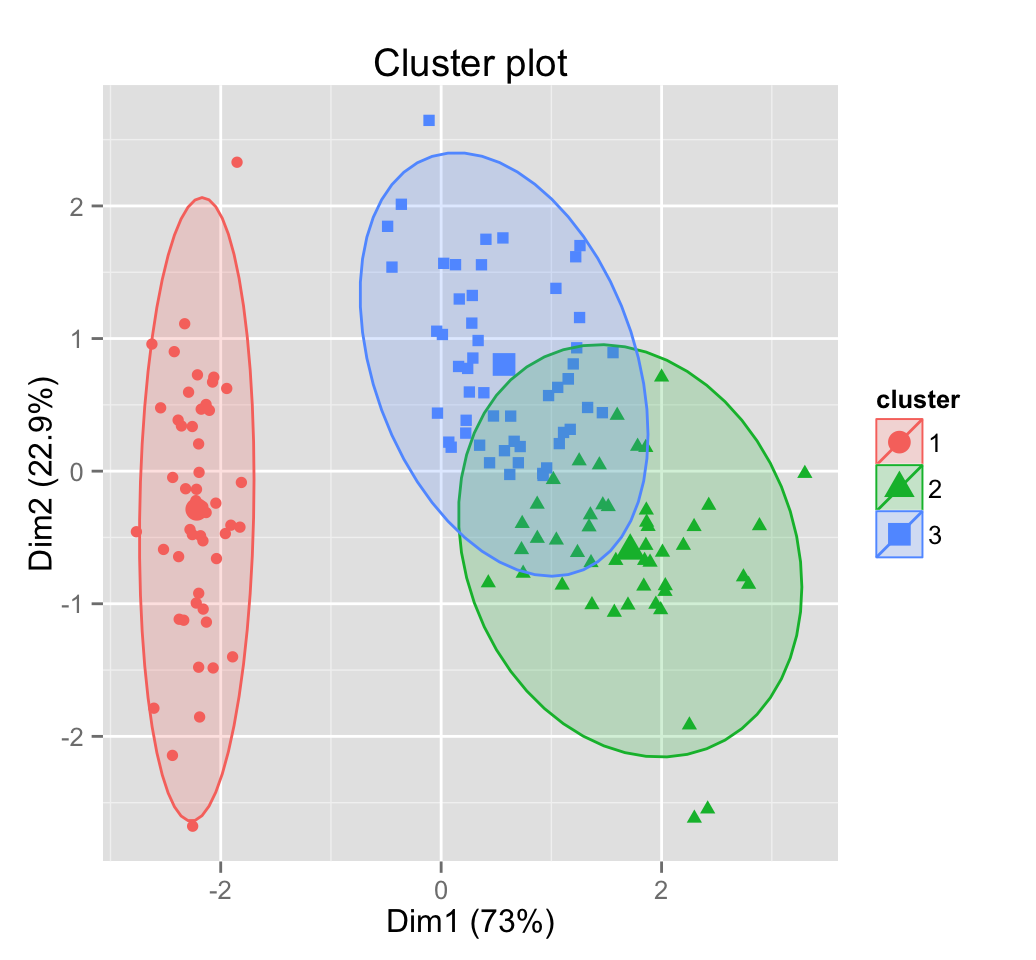

Los algoritmos de clustering sirven para modelar datos agrupados. Las aplicaciones de los clustering son:
- Marketing digital
- Taxonomia de seres vivos
- Detección de terremotos
- Imputar valores de un dataset
- Planificación urbana

## Distancia 

Las matematicas del clustering se basan en medir semejanzas y direrencias entre las cosas que se parecen, por lo tanto, lo ultimo que tenemos que preocuparnos es acerca de las distancias que se pueden calcular entre diferentes observaciones. Consideremos que tenemos un punto en un espacio n-dimensional. donde n sera el número de columnas del dataset.

Entonces imaginemonos que todos estos puntos tienen asociada a si una valoración, por lo tanto a esta valoración se le puede calcular una formula de distancia, Los grupos que han valorado las peliculas de forma muy parecida tenderan a ser agrupados en un mismo cluster. Asi tenemos los usaurios que han valorado las peliculas de manera manual o automatica. 

Para saber cuanto se parecen los usuarios se pueden usar diferentes métodos. En el caso de las puntuaciones se pueden medir con el concepto de distancia, La primera distancia que tenemos es la distancia de Manhatan:

- La distancia de manhatan, cuenta el numero de calles que separa un punto de otro, para ir de una calle a otra no puedes atravezar edificios, por lo tanto tiene en cuenta esto para la medición. Para aplicarla lo que hacemos es restar las diferencias entre sus puntuaciones, y las sumamos
$$
\sum\limits_{k=1}^{n}{|x_{ik} - x_{jk}|}
$$

- La distancia euclidea: Es la distancia en linea recta entre dos puntos, en este caso tenemos que hacer unos calculos adicionales, en este caso restamos las valoraciones al cuadrado y luego para normalizar los resultados hacemos una raiz cuadrada.

$$
\sum\limits_{k=1}^{n}{(x_{ik} - x_{jk})^2}
$$

- Distnacia de Minskowski: En este caso sumamos las diferencias y elevamos a $p$ y sacamos raiz de $p$ para normalizar. Esto hace que las distancias no se vean penalizadas en caso de que esten muy lejos. 

$$
\sum\limits_{k=1}^{n}{((x_{ik} - x_{jk})^p)^\frac{1}{p}}
$$

Una vez escogimos una medida de distancia, usamos una distance matrix, es decir aplicamos la distancia entre todos nuestros elementos. 

Por ultimo tenemos que normalizar las distancias para que todas queden entre 0 y 1

In [1]:
# Scipy.spatial contiene funciones para calcular varios tipos de distancias entre pares de puntos en un espacio n-dimensional.
from scipy.spatial import distance_matrix 
# Pandas es una librería de Python que proporciona estructuras de datos de alto rendimiento y fáciles de usar y herramientas de análisis de datos para el lenguaje de programación Python.
import pandas as pd

# Cargamos un dataset de películas
data = pd.read_csv("../datasets/movies/movies.csv", sep=";")
data.head()

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6


In [2]:
movies = data.columns.values.tolist()[1:]
dd1 = distance_matrix(data[movies], data[movies], p=1) # Manhattan
dd2 = distance_matrix(data[movies], data[movies], p=2) # Euclidea
dd3 = distance_matrix(data[movies], data[movies], p=10) # Minkowski


In [8]:
def dm_to_df(dd, col_name):
    return pd.DataFrame(dd, columns=col_name, index=col_name)

dm_to_df(dd1, data['user_id']).head()

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9


In [9]:
dm_to_df(dd2, data['user_id']).head()

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478


In [10]:
dm_to_df(dd3, data['user_id']).head()

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000


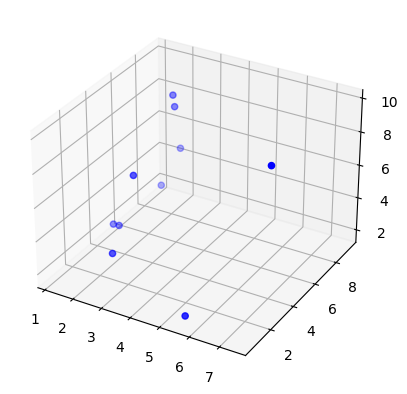

In [11]:
# Al incrementar el valor de p, la distancia entre los puntos disminuye
# La diagonal principal es 0 porque la distancia entre un punto y si mismo es 0
# Si queremos encontrar usuarios que se parecen, podemos buscar aquellos que tengan menos distancia entre ellos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Para graficar en 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["star_wars"], data["lord_of_the_rings"], data["harry_potter"], c='b', marker='o')

## Metodos jerarquicos

El clustering jerarquico tiene por objetivo agrupar clusters para crear nuevos, y tambien tienen la misión de separar los datos para realizar esta aglomeración minimizando una distancia o una medida de similitud tomando como base algunos de los elementos que tengan en cumun el cluster.

Por eso, los metodos jerarquicos se suelen dividir en métodos **Aglomerativos** y **Asociativo**:
- **Aglomerativo**: En un método aglomerativo, se comienza el analisis con tantos grupos como individuos, es decir tenemos tanto clusters como puntos en el dataset, y se van formando grupos en forma ascendente siguiendo algun método de enlace. Entonces al final del proceso los casos que se tratan quedan englobados en un mismo conglomerado.

- **Disociativo**: Es el proceso inverso, todos los puntos comienzan en un mismo **cluster** y a partir de ese grupo a través de sucesivas divisiones se forman grupos mas pequeños, al final del proceso tendremos tantos grupos como casos hayan sido tratados. 

### Clustering Aglomerativo 

Partimos con tantos clusters como puntos, y en el segundo paso se agrupan aquellos dos clusters que tengan una menor distancia entre ellos, resultando asi en $n-1$ grupos, y iterativamente tendremos $n-2$ grupos, hasta que al final solo quede un grupo que se encargue de aglutinar todo lo demas.

Todas las técnicas aglomerativas empiezan con tantos grupos como puntos y se intentan de ir agrupando en función de la distancia. Para ello se pueden presentar diversas estrategias para ir agrupando los datos, esto es debido a que ni **uno de los enfoques que veremos para resolver el problema es optimo**. El método no nos va a dar una solución optima, si no solo una serie de resultados que se pueden conseguir y al final será el criterio del investigador y el conocimineto del problema y la experiencia en el campo que investiga el que sugiere cual es el método mas adecuado. 

E igual es deseable usar los distintos **métodos de enlace** para contrastar el resultado y asi sacar **conclusiones optimas** y dar mejor fabilidad. 

#### Enlace Simple

El enlace simple se basa en unir solamente los clusters que tengan una distancia minima entre ellos, por lo tanto empezara uniendo los puntos mas cercanos y a partir de ahi definirá la distnacia entre un cluster_m y un cluster_n como la distancia entre cualquieras dos puntos uno del primer cluster y otro del segundo.

Es una distancia bastante utilizada que basicamente se trata de recalcular las diferentes distancias para cada clusters comenzando por la mas pequeña de todas ellas. 

$$d(C_m, C_n) = min(d(x_i, y_j)) \forall x_i \in C_{m}, y_j \in C_n$$

#### Enlace completo

Se basa en juntar los clusters basandose en el máximo de las distancias entre cualquieras dos puntos, por lo tanto tomaremos dos clusters que ésten lo mas cerca posible y recalcularemos la distancia como el maximo de las distancias de cualquier punto del primer cluster a culquier otro punto del segundo

$$d(C_m, C_n) = max(d(x_i, y_j)) \forall x_i \in C_{m}, y_j \in C_n$$

#### Enlace promedio
En este caso la distancia entre dos clusters es el promedio de las distancias entre cualquier punto del primer cluster y cualquier punto del segundo, por lo tanto al reagrupar si estos son los dos clusters que estan mas cerca el uno del otro recalcularemos la distancia de un cluster_m a un cluster_n como el promedio de todas las distancias de cualquier punto del cluster_1 y cualquier punto del cluster_2.

$$d(C_m, C_n) = mean(d(x_i, y_j)) \forall x_i \in C_{m}, y_j \in C_n$$

#### Enlace del centroide (Mi favorito :3)

La distancia entre dos clusters es la distancia del centroide, es decir del punto medio de cada uno de los dos clusters, en este caso cuando tenemos dos clusters, primero se calcula el centroide y se redefine la distancia entre ello como la distancia que haya del sentroide del primer al centroide del segundo. 

$$d(C_m, C_n) = d(\overline{C_m}, \overline{C_n})$$

#### Enlace de Ward (Mi segundo favorito :3)

El método de Ward es uno de los mas dificiles de entender (pero el mas fascinante para mi :3). Es un procedimiento jerarquico donde en cada etapa se unen los dos clusters que **provoquen un menor incremento en la suma de los minimos cuadrados de las diferencias dentro de cada clusters de sus individuos**, es decir, lo que se hace es **minimizar** la **suma de los minimos cuadrados de las diferencias (mse)** para cada uno de los clusters hacia su centroide. La **suma de los minimos cuadrados de las diferencias** representa la varianza entre los datos, por lo tanto lo que hace este metodo es **minimizar la varianza entre los puntos en torno a mismo centroide**, en este caso el incremento mas pequeño en el error, prueba que los nuevos elementos que son unidos a los clusters, son mas similares al cluster que se ha unido de los que ya existian. 

$$min \sum\limits^k_{i=1}\sum\limits_{x_i \in C_i}{(x_i - c_j)^2}$$

### Clustering Jerarquico

El clustering jerarquico se trata de un metodo aglomerativo, donde cada punto se considera un cluster, y en cada paso se juntan hasta obtener un unico cluster enorme basandonos en el analisis de las similitudes entre las **observaciones**. 

Pasos:
1. Cada observación en si es un cluster, si tenemos _n_ observaciones, tendremos _n_ clusters. 
2. Encontraremos la menor distancia dentro de la matriz de distancia. 
3. Uniremos las dos observaciones mas proximas entre si.
4. Recalcularemos las distancias de todos los clusteres anteriores hasta el nuevo cluster formado.
5. Reiteramos los pasos 2, 3, 4, hasta que solo queda un cluster con _n_ observaciones. 


In [5]:
# Enlazando datos manualmente
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generamos los enlaces
Z = linkage(data[movies], 'ward')
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

In [6]:
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [7]:
Z = linkage(data[movies], 'centroid')
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 8.        , 10.        ,  3.46157479,  3.        ],
       [ 5.        , 13.        ,  4.06721308,  4.        ],
       [11.        , 12.        ,  4.71221816,  4.        ],
       [ 3.        , 14.        ,  5.17445649,  5.        ],
       [15.        , 16.        ,  6.07871286,  9.        ],
       [ 2.        , 17.        ,  7.91891001, 10.        ]])

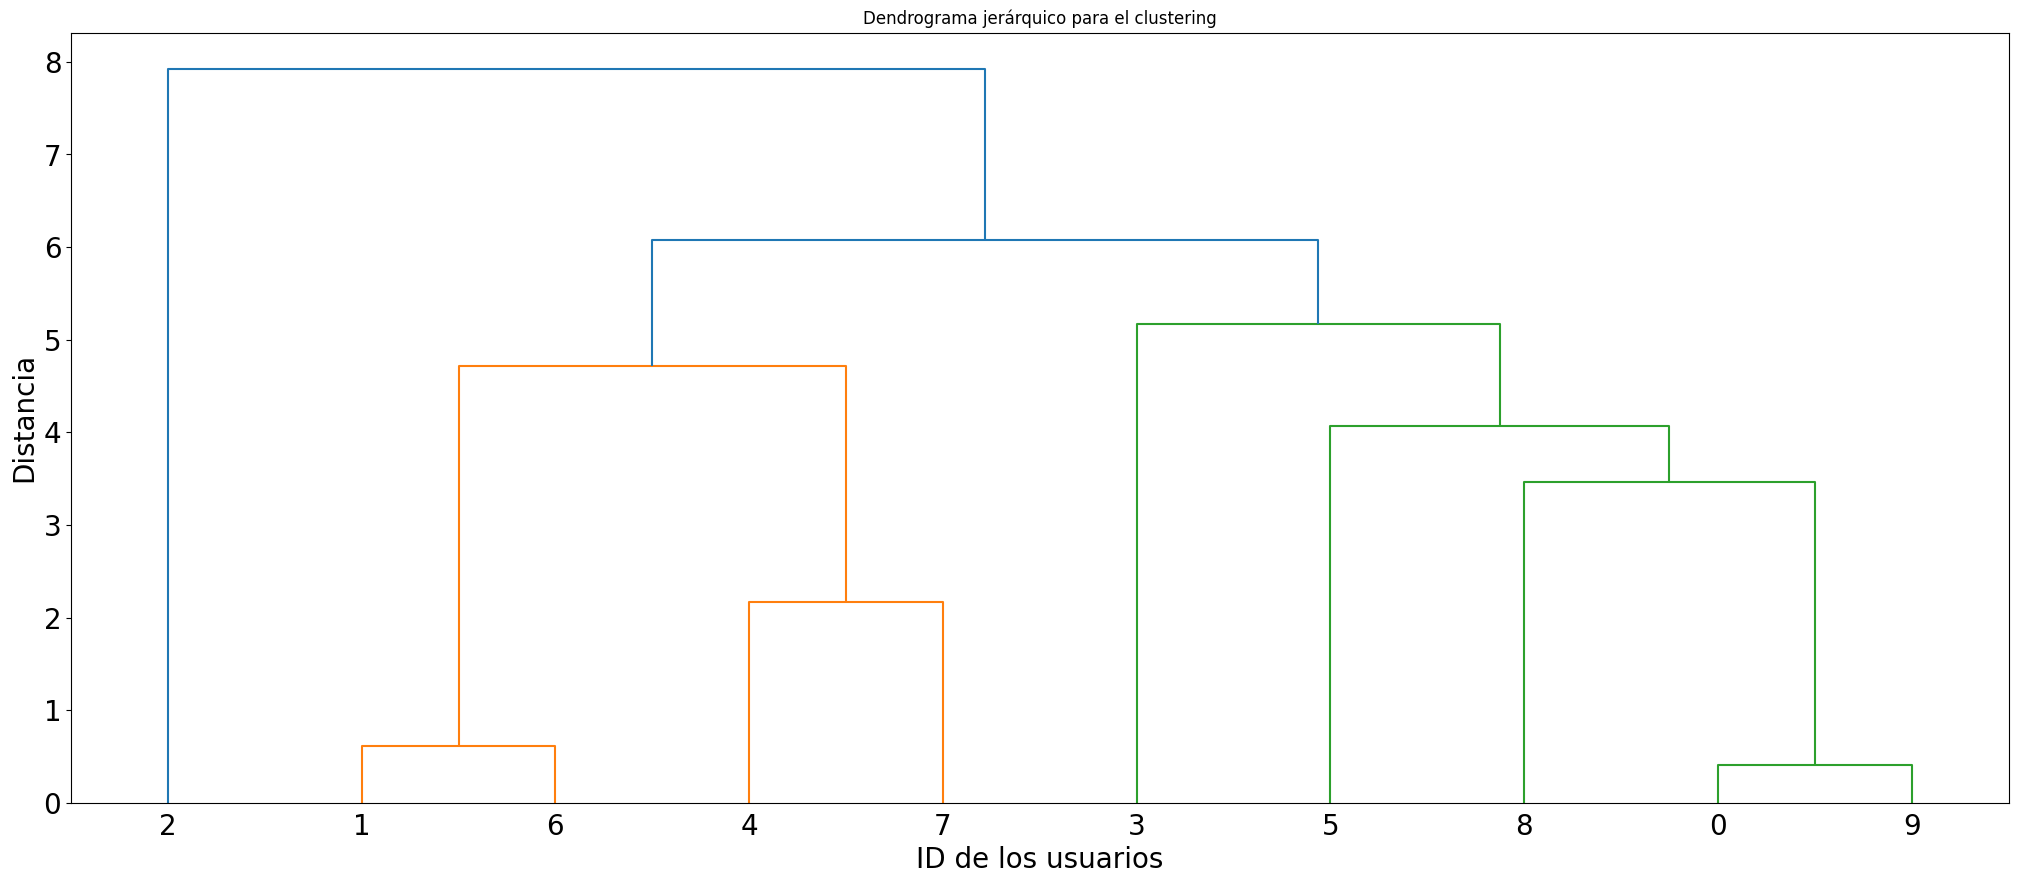

In [13]:
plt.figure(figsize=(25, 10))
plt.title('Dendrograma jerárquico para el clustering')
plt.xlabel('ID de los usuarios')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
# Fontsizes
plt.xlabel('ID de los usuarios', fontsize=20)
plt.ylabel('Distancia', fontsize=20)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.show()